# Text Data Loading, Creating a DataFrame

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import os
from textblob import TextBlob
import datetime as dt
from wordcloud import WordCloud
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [3]:
# Import csv file into a dataframe
df_hourly = pd.read_csv('./Resources/Hourly_Data_by_year.csv')

In [4]:
# convert the timezone to CST
df_hourly['Datetime'] = pd.to_datetime(df_hourly['Datetime'], utc=True)
df_hourly['Datetime'] = pd.DatetimeIndex(df_hourly['Datetime']).tz_convert('US/Central')
# rename the column 'Datetime'
df_hourly = df_hourly.rename(columns = {'Datetime':'date'})

In [5]:
df_hourly.head()

date       Open       High        Low      Close  Adj Close   Volume
0 2019-10-16 08:30:00-05:00  51.478004  52.176003  51.384003  52.000000  52.000000  1836189
1 2019-10-16 09:30:00-05:00  51.990002  52.420002  51.917999  52.115639  52.115639  1452155
2 2019-10-16 10:30:00-05:00  52.111736  52.308002  52.020000  52.118000  52.118000   797078
3 2019-10-16 11:30:00-05:00  52.144001  52.167999  51.920002  52.070000  52.070000   482371
4 2019-10-16 12:30:00-05:00  52.058002  52.121998  51.487541  51.514000  51.514000   774074

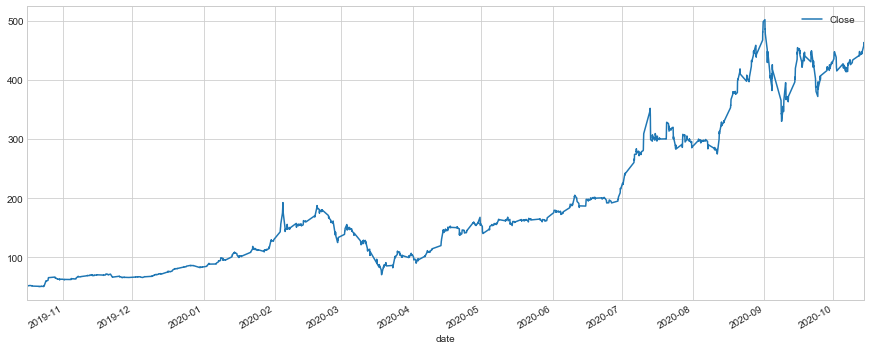

In [6]:
df_hourly.plot(x='date', y='Close', figsize=(15,6));

In [7]:
# # Import csv file into a dataframe
# df_daily = pd.read_csv('./Resources/Daily_trading_data.txt', sep=',')

In [8]:
# df_daily.head()

In [9]:
# # parsing the dates into datetime and changing the format.
# df_daily['Date'] = pd.to_datetime(df_daily['Date']).dt.date
# # rename the column
# df_daily= df_daily.rename(columns ={'Date':'date'})

In [10]:
# df_daily.plot(x='date', y='Close', figsize=(15,5));

In [11]:
# Import a text file to analyze
df_tsla = pd.read_csv('./Resources/concat_query_tesla_price_final.csv')

In [12]:
df_tsla['date'] = pd.to_datetime(df_tsla['date'], utc=True)
df_tsla['date'] = pd.DatetimeIndex(df_tsla['date']).tz_convert('US/Central')

In [13]:
df_tsla = df_tsla.sort_values('date', ascending = True)
df_tsla = df_tsla.reset_index(drop=True)
df_tsla.head()

date                                               text  Subjectivity  Polarity  Analysis
0 2020-05-01 00:00:37-05:00  being in the s&p means s&p index stock funds *...          0.15      -0.2  Negative
1 2020-05-01 00:05:33-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral
2 2020-05-01 00:07:22-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral
3 2020-05-01 00:30:45-05:00  tesla vp explains why china-made model 3 drops...          0.00       0.0   Neutral
4 2020-05-01 00:31:01-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral

## Labelling price increase or decrease by interval

In [14]:
# df_daily['daily return'] = df_daily['Close'].pct_change()
df_hourly['hourly return'] = df_hourly['Close'].pct_change()

In [15]:
# dropping dates before 2020-04-30
df_hourly = df_hourly[df_hourly['date'] > '2020-04-30']

In [16]:
df_hourly.head()

date        Open        High         Low       Close   Adj Close   Volume  hourly return
939 2020-04-30 08:30:00-05:00  171.037994  173.964005  165.649994  167.694000  167.694000  7879683       0.048284
940 2020-04-30 09:30:00-05:00  167.757996  168.220001  162.386002  165.144577  165.144577  4202242      -0.015203
941 2020-04-30 10:30:00-05:00  165.189468  166.858002  164.199997  164.380005  164.380005  2200198      -0.004630
942 2020-04-30 11:30:00-05:00  164.343994  164.600006  157.399994  157.552002  157.552002  3460202      -0.041538
943 2020-04-30 12:30:00-05:00  157.552002  159.197998  153.000000  154.054016  154.054016  4656504      -0.022202

In [17]:
# Or add a column with binary number.
def getBinary(score):
    if score <= 0:
        return 0
    else:
        return 1

df_hourly['tick'] = df_hourly['hourly return'].apply(getBinary)
df_hourly.head(10)

date        Open        High         Low       Close   Adj Close   Volume  hourly return  tick
939 2020-04-30 08:30:00-05:00  171.037994  173.964005  165.649994  167.694000  167.694000  7879683       0.048284     1
940 2020-04-30 09:30:00-05:00  167.757996  168.220001  162.386002  165.144577  165.144577  4202242      -0.015203     0
941 2020-04-30 10:30:00-05:00  165.189468  166.858002  164.199997  164.380005  164.380005  2200198      -0.004630     0
942 2020-04-30 11:30:00-05:00  164.343994  164.600006  157.399994  157.552002  157.552002  3460202      -0.041538     0
943 2020-04-30 12:30:00-05:00  157.552002  159.197998  153.000000  154.054016  154.054016  4656504      -0.022202     0
944 2020-04-30 13:30:00-05:00  154.056000  158.399994  152.699997  157.804001  157.804001  3180325       0.024342     1
945 2020-04-30 14:30:00-05:00  157.828003  158.695999  155.199997  156.498001  156.498001  2063202      -0.008276     0
946 2020-05-01 08:30:00-05:00  150.824005  154.554001  148.318024  152.372528  152.372528  4569225      -0.026361     0
947 2020-05-01 09:30:00-05:00  152.335678  153.889999  143.529007  146.451202  146.451202  6130644      -0.038861     0
948 2020-05-01 10:30:00-05:00  146.449997  146.644806  136.608002  142.300003  142.300003  9445744      -0.028345     0

In [18]:
df_hourly['date only'] = df_hourly['date'].dt.date
df_hourly['hour'] = df_hourly['date'].dt.hour
df_hourly.head()

date        Open        High         Low       Close   Adj Close   Volume  hourly return  tick   date only  hour
939 2020-04-30 08:30:00-05:00  171.037994  173.964005  165.649994  167.694000  167.694000  7879683       0.048284     1  2020-04-30     8
940 2020-04-30 09:30:00-05:00  167.757996  168.220001  162.386002  165.144577  165.144577  4202242      -0.015203     0  2020-04-30     9
941 2020-04-30 10:30:00-05:00  165.189468  166.858002  164.199997  164.380005  164.380005  2200198      -0.004630     0  2020-04-30    10
942 2020-04-30 11:30:00-05:00  164.343994  164.600006  157.399994  157.552002  157.552002  3460202      -0.041538     0  2020-04-30    11
943 2020-04-30 12:30:00-05:00  157.552002  159.197998  153.000000  154.054016  154.054016  4656504      -0.022202     0  2020-04-30    12

### Text dataframe processing

In [19]:
df_tsla['date only'] = df_tsla['date'].dt.date
df_tsla['hour'] = df_tsla['date'].dt.hour
df_tsla.head()

date                                               text  Subjectivity  Polarity  Analysis   date only  hour
0 2020-05-01 00:00:37-05:00  being in the s&p means s&p index stock funds *...          0.15      -0.2  Negative  2020-05-01     0
1 2020-05-01 00:05:33-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral  2020-05-01     0
2 2020-05-01 00:07:22-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral  2020-05-01     0
3 2020-05-01 00:30:45-05:00  tesla vp explains why china-made model 3 drops...          0.00       0.0   Neutral  2020-05-01     0
4 2020-05-01 00:31:01-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral  2020-05-01     0

### Subjectivity Score Processing (optional)

1. Dropping rows with subjectivity score more than 0.4 or
2. Instead of dropping out, creating a new column with a polarity score weighted by subjectivity score.
  - If subjectivity score <= 0.2, weighting 140% of the corresponding polarity score
  - If  0.2 < subjectivity score <= 0.4, weighting 120% of the corresponding polarity score
  - Likewise,  0.4 < subjectivity score <= 0.6, => 100%   
               0.6 < subjectivity score <= 0.8, => 80%   
               0.8 < subjectivity score <= 1.0, => 60%

#### 1. Dropping all rows that have subjectivity scores more than 0.4

In [20]:
df_tsla_drop = df_tsla[df_tsla['Subjectivity']<= 0.4]

In [21]:
df_tsla_drop.head()

date                                               text  Subjectivity  Polarity  Analysis   date only  hour
0 2020-05-01 00:00:37-05:00  being in the s&p means s&p index stock funds *...          0.15      -0.2  Negative  2020-05-01     0
1 2020-05-01 00:05:33-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral  2020-05-01     0
2 2020-05-01 00:07:22-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral  2020-05-01     0
3 2020-05-01 00:30:45-05:00  tesla vp explains why china-made model 3 drops...          0.00       0.0   Neutral  2020-05-01     0
4 2020-05-01 00:31:01-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral  2020-05-01     0

#### 2. Add a new column with the weighted polarity score

In [22]:
df_tsla_weight = df_tsla.copy()

In [23]:
def getWeight(score):
    if score <= 0.2:
        return 1.4
    elif score <=0.4:
        return 1.2
    elif score <=0.6:
        return 1.0
    elif score <=0.8:
        return 0.8
    else:
        return 0.6


df_tsla_weight['Adj Polarity'] = df_tsla['Subjectivity'].apply(getWeight)*df_tsla['Polarity']
df_tsla_weight.tail()     

date                                               text  Subjectivity  Polarity  Analysis   date only  hour  Adj Polarity
41425 2020-10-13 14:07:47-05:00  i hate days like this, where my tesla news fee...      0.500000 -0.205000  Negative  2020-10-13    14     -0.205000
41426 2020-10-13 14:12:40-05:00  tesla cuts model s price by $3,000 amid sales ...      0.000000  0.000000   Neutral  2020-10-13    14      0.000000
41427 2020-10-13 14:20:53-05:00  would love a tesla. out of my price range atm ...      0.600000  0.500000  Positive  2020-10-13    14      0.500000
41428 2020-10-13 14:20:59-05:00  on ann: nhtsa probes fires in certain chevy bo...      0.512987  0.175325  Positive  2020-10-13    14      0.175325
41429 2020-10-13 14:26:07-05:00  why get a model s perf to drive around alone w...      0.750000  0.450000  Positive  2020-10-13    14      0.360000

## Merging Dataframes

#### 1. For df_tsla_drop

In [24]:
# Merging the dataframes by using reduce function
from functools import reduce
data_frames = [df_tsla_drop, df_hourly]
df_drop = reduce(lambda  left,right: pd.merge(left,right,on=['date only', 'hour'],
                                            how='outer'), data_frames)
df_drop.head()

date_x                                               text  Subjectivity  Polarity  Analysis   date only  hour date_y  Open  High  Low  Close  Adj Close  Volume  hourly return  tick
0 2020-05-01 00:00:37-05:00  being in the s&p means s&p index stock funds *...          0.15      -0.2  Negative  2020-05-01     0    NaT   NaN   NaN  NaN    NaN        NaN     NaN            NaN   NaN
1 2020-05-01 00:05:33-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral  2020-05-01     0    NaT   NaN   NaN  NaN    NaN        NaN     NaN            NaN   NaN
2 2020-05-01 00:07:22-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral  2020-05-01     0    NaT   NaN   NaN  NaN    NaN        NaN     NaN            NaN   NaN
3 2020-05-01 00:30:45-05:00  tesla vp explains why china-made model 3 drops...          0.00       0.0   Neutral  2020-05-01     0    NaT   NaN   NaN  NaN    NaN        NaN     NaN            NaN   NaN
4 2020-05-01 00:31:01-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral  2020-05-01     0    NaT   NaN   NaN  NaN    NaN        NaN     NaN            NaN   NaN

#### 2. For df_tsla_weight

In [25]:
# Merging the dataframes by using reduce function
from functools import reduce
data_frames = [df_tsla_weight, df_hourly]
df_weight = reduce(lambda  left,right: pd.merge(left,right,on=['date only', 'hour'],
                                            how='outer'), data_frames)
df_weight.head()

date_x                                               text  Subjectivity  Polarity  Analysis   date only  hour  Adj Polarity date_y  Open  High  Low  Close  Adj Close  Volume  hourly return  tick
0 2020-05-01 00:00:37-05:00  being in the s&p means s&p index stock funds *...          0.15      -0.2  Negative  2020-05-01     0         -0.28    NaT   NaN   NaN  NaN    NaN        NaN     NaN            NaN   NaN
1 2020-05-01 00:05:33-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral  2020-05-01     0          0.00    NaT   NaN   NaN  NaN    NaN        NaN     NaN            NaN   NaN
2 2020-05-01 00:07:22-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral  2020-05-01     0          0.00    NaT   NaN   NaN  NaN    NaN        NaN     NaN            NaN   NaN
3 2020-05-01 00:30:45-05:00  tesla vp explains why china-made model 3 drops...          0.00       0.0   Neutral  2020-05-01     0          0.00    NaT   NaN   NaN  NaN    NaN        NaN     NaN            NaN   NaN
4 2020-05-01 00:31:01-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral  2020-05-01     0          0.00    NaT   NaN   NaN  NaN    NaN        NaN     NaN            NaN   NaN

In [26]:
# Drop unnecessary columns
df_drop = df_drop.drop(columns = ['Open', 'High', 'Low', 'Volume', 'Adj Close', 'Volume'])
df_weight = df_weight.drop(columns = ['Open', 'High', 'Low', 'Volume', 'Adj Close', 'Volume', 'Polarity'])

In [27]:
df_drop['date only'] = pd.to_datetime(df_drop['date only'])
df_weight['date only'] = pd.to_datetime(df_weight['date only'])

In [28]:
df_drop = df_drop[['date only', 'hour', 'Close', 'hourly return', 'tick','text', 'Subjectivity', 'Polarity', 'Analysis', 'date_x','date_y']]
df_weight = df_weight[['date only', 'hour', 'Close', 'hourly return', 'tick','text', 'Subjectivity', 'Adj Polarity', 'Analysis', 'date_x','date_y']]

In [29]:
df_drop = df_drop.sort_values(['date only', 'hour'], ascending=True)
df_weight = df_weight.sort_values(['date only', 'hour'], ascending=True)

In [30]:
df_weight.head()

date only  hour       Close  hourly return  tick text  Subjectivity  Adj Polarity Analysis date_x                    date_y
41430 2020-04-30     8  167.694000       0.048284   1.0  NaN           NaN           NaN      NaN    NaT 2020-04-30 08:30:00-05:00
41431 2020-04-30     9  165.144577      -0.015203   0.0  NaN           NaN           NaN      NaN    NaT 2020-04-30 09:30:00-05:00
41432 2020-04-30    10  164.380005      -0.004630   0.0  NaN           NaN           NaN      NaN    NaT 2020-04-30 10:30:00-05:00
41433 2020-04-30    11  157.552002      -0.041538   0.0  NaN           NaN           NaN      NaN    NaT 2020-04-30 11:30:00-05:00
41434 2020-04-30    12  154.054016      -0.022202   0.0  NaN           NaN           NaN      NaN    NaT 2020-04-30 12:30:00-05:00

In [31]:
# df.to_csv('./Resources/elonmusk_tweets_hourly_price.csv', index=False)

## Analysis

### Things to be considered
- What sentiment score should we use?    
  (Subjectivity or Polarity, or both combined - weighting on Polarity score with more objective one)    
- Which score value should we use to represent the same hourly(or daily) window, in case of having multiple scores?    
  (mean, count, add, take the first one or the last one, etc)   
- How to deal with texts generated off market hours including weekends?   
  (dropping them out or tagging them the same (up and down) ticker with the most recent one etc)   
 
 

### 1. Using various sentiment score(Polarity only) for all texts regardless of market hour. 

In [32]:
# take the average polarity scores in the same hour window.
df_mean = df_drop.groupby(['date only', 'hour']).mean()
df_sum = df_drop.groupby(['date only', 'hour']).sum()
df_count = df_drop.groupby(['date only', 'hour']).count()
df_first = df_drop.groupby(['date only', 'hour']).first()
df_last = df_drop.groupby(['date only', 'hour']).last()
df_data = df_mean.copy()

In [33]:
df_data = df_data.rename(columns = {'Polarity':'polarity mean'})
df_data['polarity sum'] = df_sum['Polarity']
df_data['polarity count'] = df_count['Polarity']
df_data['polarity first'] = df_first['Polarity']
df_data['polarity last'] = df_last['Polarity']
df_data.head()

Close  hourly return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last
date only  hour                                                                                                                           
2020-04-30 8     167.694000       0.048284   1.0           NaN            NaN           0.0               0             NaN            NaN
           9     165.144577      -0.015203   0.0           NaN            NaN           0.0               0             NaN            NaN
           10    164.380005      -0.004630   0.0           NaN            NaN           0.0               0             NaN            NaN
           11    157.552002      -0.041538   0.0           NaN            NaN           0.0               0             NaN            NaN
           12    154.054016      -0.022202   0.0           NaN            NaN           0.0               0             NaN            NaN

In [34]:
df_data['polarity mean change'] = df_data['polarity mean'].pct_change()
df_data['polarity sum change'] = df_data['polarity sum'].pct_change()
df_data['polarity count change'] = df_data['polarity count'].pct_change()
df_data['polarity first change'] = df_data['polarity first'].pct_change()
df_data['polarity last change'] = df_data['polarity last'].pct_change()
df_data.head()

Close  hourly return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
date only  hour                                                                                                                                                                                                                                          
2020-04-30 8     167.694000       0.048284   1.0           NaN            NaN           0.0               0             NaN            NaN                   NaN                  NaN                    NaN                    NaN                   NaN
           9     165.144577      -0.015203   0.0           NaN            NaN           0.0               0             NaN            NaN                   NaN                  NaN                    NaN                    NaN                   NaN
           10    164.380005      -0.004630   0.0           NaN            NaN           0.0               0             NaN            NaN                   NaN                  NaN                    NaN                    NaN                   NaN
           11    157.552002      -0.041538   0.0           NaN            NaN           0.0               0             NaN            NaN                   NaN                  NaN                    NaN                    NaN                   NaN
           12    154.054016      -0.022202   0.0           NaN            NaN           0.0               0             NaN            NaN                   NaN                  NaN                    NaN                    NaN                   NaN

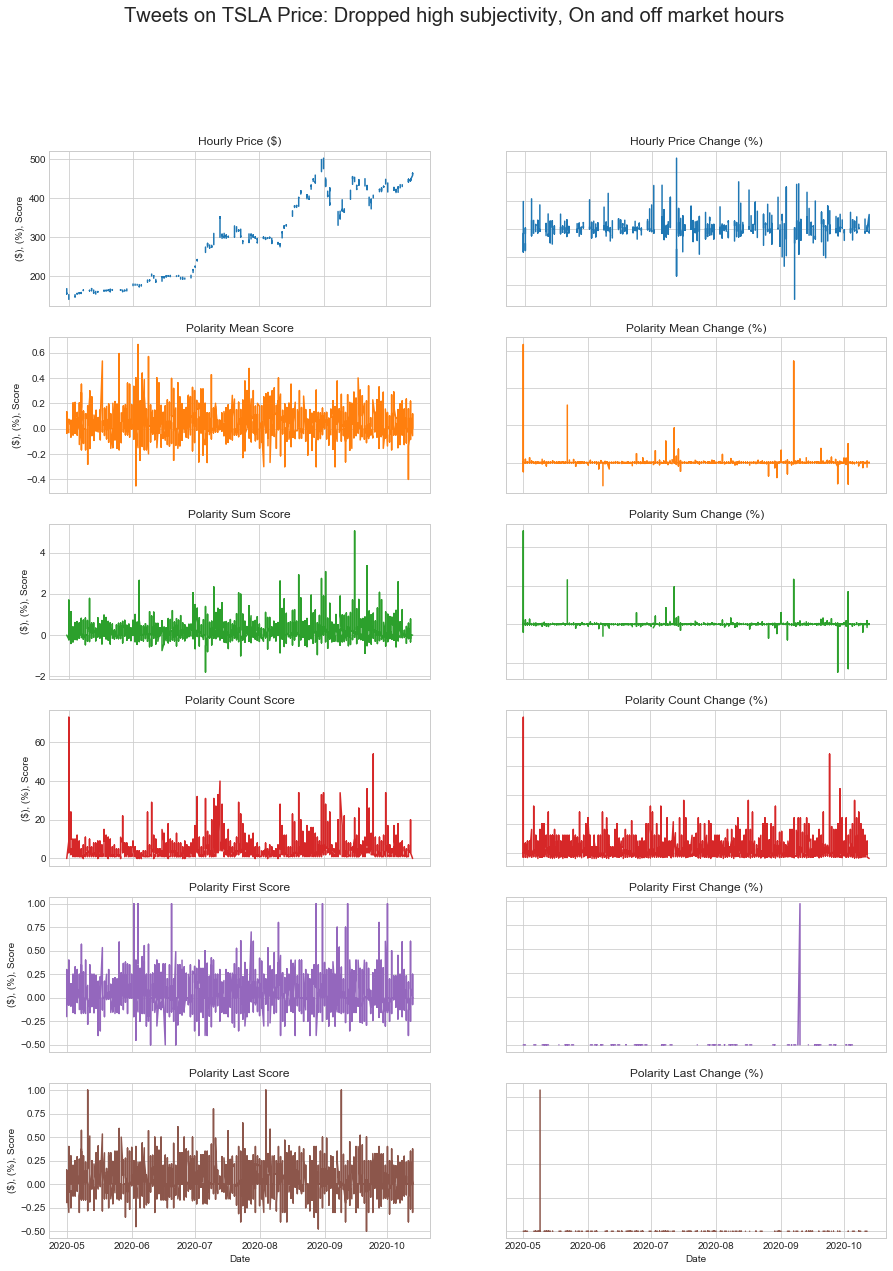

In [35]:
# plot total overviews
date_only = df_data.index.get_level_values(0)

fig, axs = plt.subplots(6, 2, figsize=(15,20))
fig.suptitle('Tweets on TSLA Price: Dropped high subjectivity, On and off market hours', fontsize=20)

axs[0, 0].plot(date_only, df_data['Close'])
axs[0, 0].set_title('Hourly Price ($)')
axs[1, 0].plot(date_only, df_data['polarity mean'], 'tab:orange')
axs[1, 0].set_title('Polarity Mean Score')
axs[2, 0].plot(date_only, df_data['polarity sum'], 'tab:green')
axs[2, 0].set_title('Polarity Sum Score')
axs[3, 0].plot(date_only, df_data['polarity count'], 'tab:red')
axs[3, 0].set_title('Polarity Count Score')
axs[4, 0].plot(date_only, df_data['polarity first'], 'tab:purple')
axs[4, 0].set_title('Polarity First Score')
axs[5, 0].plot(date_only, df_data['polarity last'], 'tab:brown')
axs[5, 0].set_title('Polarity Last Score')

axs[0, 1].plot(date_only, df_data['hourly return'])
axs[0, 1].set_title('Hourly Price Change (%)')
axs[1, 1].plot(date_only, df_data['polarity mean change'], 'tab:orange')
axs[1, 1].set_title('Polarity Mean Change (%)')
axs[2, 1].plot(date_only, df_data['polarity sum change'], 'tab:green')
axs[2, 1].set_title('Polarity Sum Change (%)')
axs[3, 1].plot(date_only, df_data['polarity count change'], 'tab:red')
axs[3, 1].set_title('Polarity Count Change (%)')
axs[4, 1].plot(date_only, df_data['polarity first change'], 'tab:purple')
axs[4, 1].set_title('Polarity First Change (%)')
axs[5, 1].plot(date_only, df_data['polarity last change'], 'tab:brown')
axs[5, 1].set_title('Polarity Last Change (%)')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [36]:
# # plot polarity mean
# date_only = df_data.index.get_level_values(0)

# fig, ax1 = plt.subplots(figsize=(15,6))

# ax2 = ax1.twinx()
# ax1.plot(date_only, df_data['Close'], color='g')
# ax2.plot(date_only, df_data['polarity mean'], color='b', alpha=0.2)

# ax1.set_xlabel('Date')
# ax1.set_ylabel('Hourly Price ($)', color='g')
# ax2.set_ylabel('Polarity Score', color='b')
# ax1.set_xticklabels(date_only, rotation=45, size=8)

# fig.show();

In [37]:
correlation_drop = df_data.corr()
correlation_drop

Close  hourly return      tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
Close                  1.000000       0.020711  0.013880     -0.175841       0.042315      0.172565        0.228477        0.012634      -0.003505             -0.010370            -0.012242              -0.047463              -0.015000             -0.055433
hourly return          0.020711       1.000000  0.603705     -0.015229       0.001035     -0.003923       -0.038869       -0.012752      -0.031235             -0.017447            -0.019441               0.029401               0.067119             -0.028481
tick                   0.013880       0.603705  1.000000      0.029443       0.018607      0.021525       -0.015595        0.010063      -0.064181             -0.051827            -0.051583               0.027856               0.052820             -0.047751
Subjectivity          -0.175841      -0.015229  0.029443      1.000000       0.233166      0.113343       -0.122148        0.156023       0.138717              0.009629            -0.000370              -0.021901              -0.009734              0.048275
polarity mean          0.042315       0.001035  0.018607      0.233166       1.000000      0.620593       -0.046724        0.639372       0.599652              0.036492             0.016700              -0.012423              -0.007483             -0.043678
polarity sum           0.172565      -0.003923  0.021525      0.113343       0.620593      1.000000        0.403126        0.405471       0.388233              0.062366             0.043892               0.113252               0.002197             -0.019025
polarity count         0.228477      -0.038869 -0.015595     -0.122148      -0.046724      0.403126        1.000000       -0.022126      -0.021327              0.041120             0.049333               0.292341               0.058778             -0.018427
polarity first         0.012634      -0.012752  0.010063      0.156023       0.639372      0.405471       -0.022126        1.000000       0.159205              0.035916             0.028498               0.000003               0.004182             -0.027377
polarity last         -0.003505      -0.031235 -0.064181      0.138717       0.599652      0.388233       -0.021327        0.159205       1.000000              0.002995            -0.020152              -0.016596              -0.006836             -0.027788
polarity mean change  -0.010370      -0.017447 -0.051827      0.009629       0.036492      0.062366        0.041120        0.035916       0.002995              1.000000             0.911502              -0.022784              -0.000737             -0.003741
polarity sum change   -0.012242      -0.019441 -0.051583     -0.000370       0.016700      0.043892        0.049333        0.028498      -0.020152              0.911502             1.000000              -0.016657              -0.000565             -0.001235
polarity count change -0.047463       0.029401  0.027856     -0.021901      -0.012423      0.113252        0.292341        0.000003      -0.016596             -0.022784            -0.016657               1.000000              -0.015808             -0.021985
polarity first change -0.015000       0.067119  0.052820     -0.009734      -0.007483      0.002197        0.058778        0.004182      -0.006836             -0.000737            -0.000565              -0.015808               1.000000             -0.063706
polarity last change  -0.055433      -0.028481 -0.047751      0.048275      -0.043678     -0.019025       -0.018427       -0.027377      -0.027788             -0.003741            -0.001235              -0.021985              -0.063706              1.000000

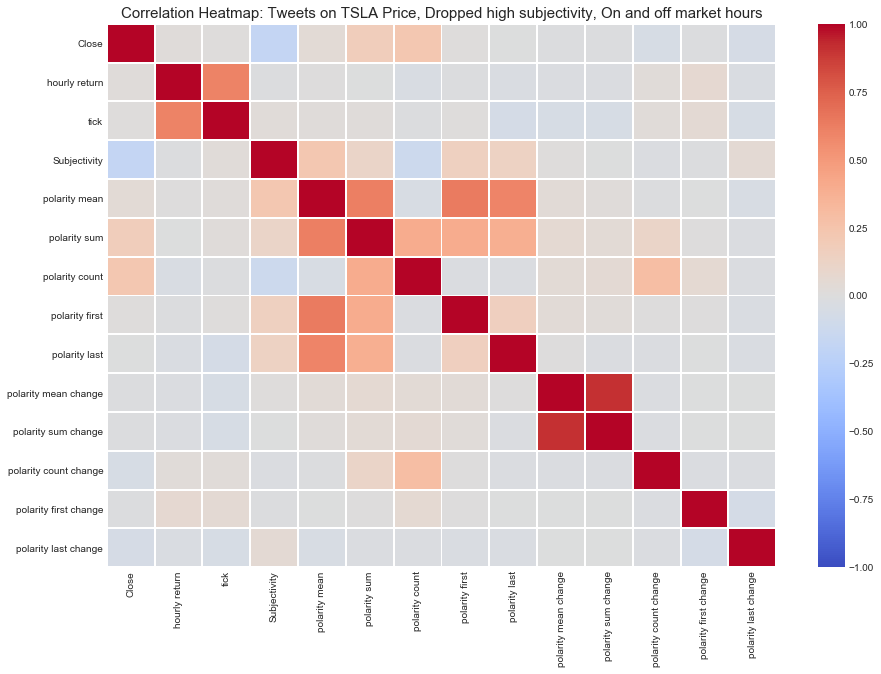

In [38]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap: Tweets on TSLA Price, Dropped high subjectivity, On and off market hours', fontsize=15)
sns.heatmap(correlation_drop, vmin=-1, vmax=1, linewidth=1, cmap='coolwarm');

### 2. Using various sentiment score(Polarity only) for only the texts that matches with market hours. 

In [39]:
# Dropping unmatching rows 
df_2 = df_data.dropna()
df_2

Close  hourly return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
date only  hour                                                                                                                                                                                                                                          
2020-05-01 13    141.537994      -0.006897   0.0      0.217459       0.039276      1.649578              42        0.080000       0.000000         -1.234704e+02          -103.875151              -0.160000                    inf             -1.000000
           14    140.261993      -0.009015   0.0      0.221606       0.049161      1.573164              32        0.200000       0.125000          2.517009e-01            -0.046323              -0.238095           1.500000e+00                   inf
2020-05-04 11    146.506012      -0.012763   0.0      0.260635       0.031076      0.217535               7        0.108889       0.000000          6.426042e+01            64.260417               0.000000                    inf             -1.000000
           12    148.562195       0.014035   1.0      0.133333      -0.016667     -0.050000               3        0.000000      -0.050000         -1.536313e+00            -1.229848              -0.571429          -1.000000e+00                  -inf
           14    152.242004       0.014925   1.0      0.315833       0.202222      0.606667               3        0.040000       0.200000                   inf                  inf               0.500000                    inf                   inf
2020-05-05 8     154.475662       0.014672   1.0      0.158853      -0.011958     -0.083704               7       -0.011481       0.050000         -1.071746e+00            -1.167407               1.333333                   -inf                   inf
           9     154.404037      -0.000464   0.0      0.193805       0.045997      0.551970              12        0.000000       0.000000         -4.846691e+00            -7.594328               0.714286          -1.000000e+00             -1.000000
           11    154.601761       0.000050   1.0      0.298468       0.053485      0.160455               3        0.000000       0.145455          1.272780e-01            -0.516881              -0.571429          -1.000000e+00                   inf
2020-05-06 8     154.448883       0.005448   1.0      0.311427       0.116811      0.350433               3        0.058766       0.291667          1.034772e+00             1.034772               0.000000                    inf              0.693548
           9     154.843765       0.002557   1.0      0.239286       0.076667      0.383333               5        0.080000       0.190000         -3.436689e-01             0.093885               0.666667           3.613260e-01             -0.348571
           10    155.076004       0.001500   1.0      0.120317       0.017778      0.053333               3        0.053333       0.000000         -7.681159e-01            -0.860870              -0.400000          -3.333333e-01             -1.000000
           12    156.164001       0.003883   1.0      0.195666       0.012364      0.037093               3        0.087093      -0.050000                   inf                  inf               0.500000                    inf                  -inf
           13    157.322906       0.007421   1.0      0.350455       0.098030      0.588181               6        0.000000       0.070000          6.928434e+00            14.856867               1.000000          -1.000000e+00             -2.400000
2020-05-07 8     156.650589       0.001026   1.0      0.337246       0.112462      0.337385               3       -0.017045       0.264931          4.078915e+00            14.236746               2.000000          -1.769795e+00             10.964606
           9     155.4

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


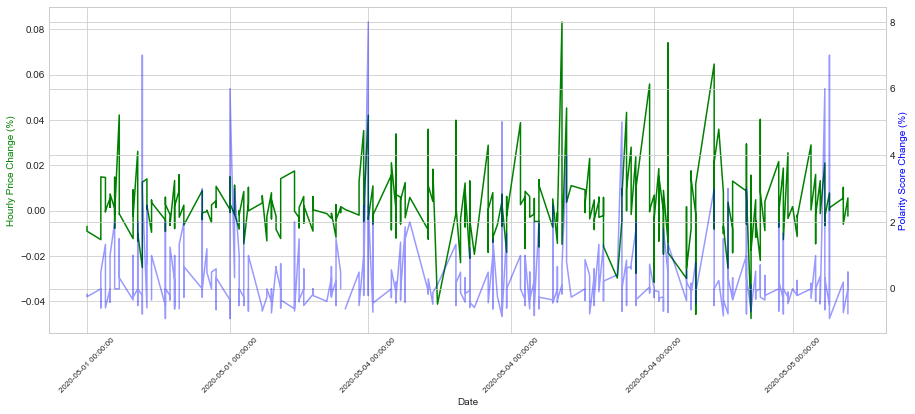

In [40]:
# plot polarity mean change vs hourly return
date_only = df_2.index.get_level_values(0)

fig, ax1 = plt.subplots(figsize=(15,6))

ax2 = ax1.twinx()
ax1.plot(date_only, df_2['hourly return'], color='g')
ax2.plot(date_only, df_2['polarity count change'], color='b', alpha=0.4)

ax1.set_xlabel('Date')
ax1.set_ylabel('Hourly Price Change (%)', color='g')
ax2.set_ylabel('Polarity Score Change (%)', color='b')
ax1.set_xticklabels(date_only, rotation=45, size=8)

fig.show();

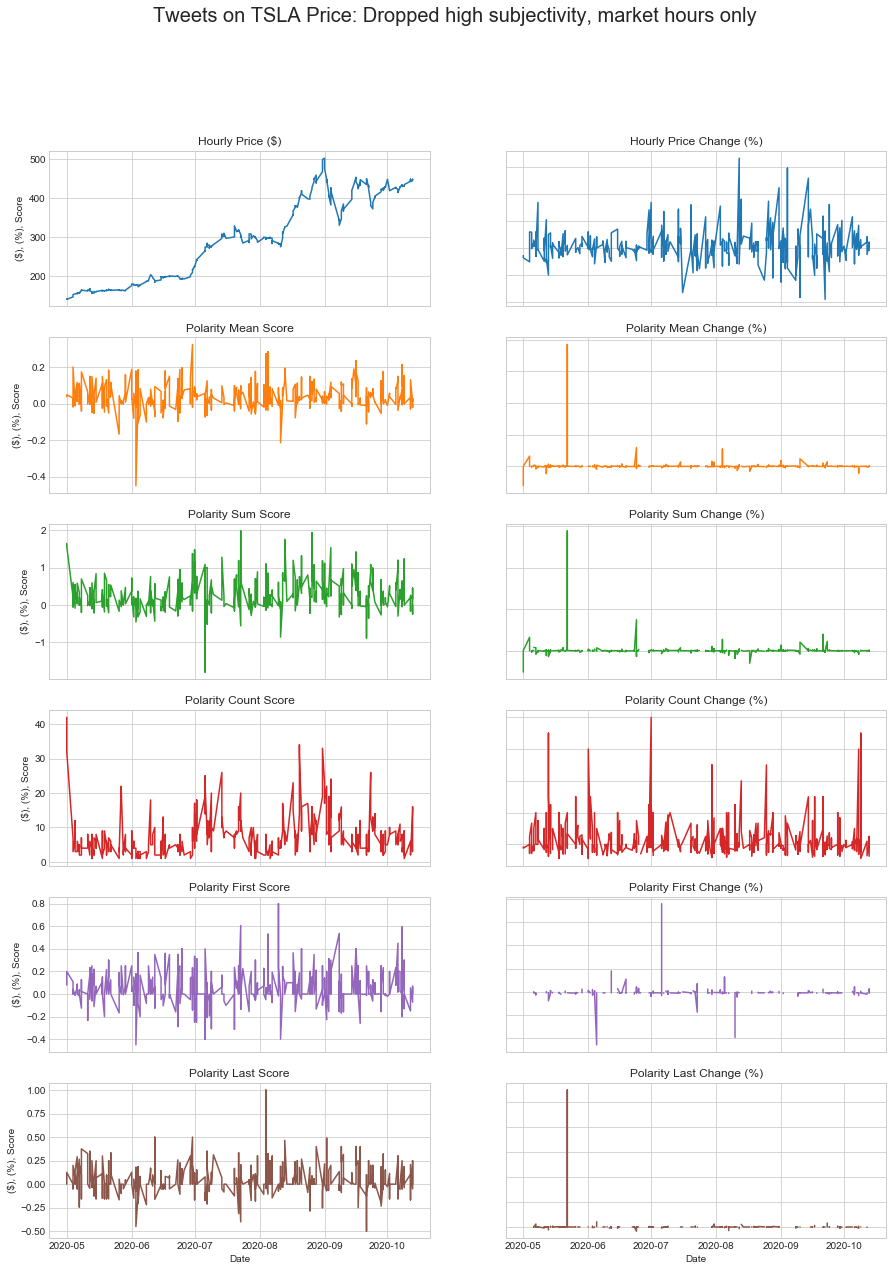

In [41]:
# plot total overviews
date_only = df_2.index.get_level_values(0)

fig, axs = plt.subplots(6, 2, figsize=(15,20))
fig.suptitle('Tweets on TSLA Price: Dropped high subjectivity, market hours only', fontsize=20)

axs[0, 0].plot(date_only, df_2['Close'])
axs[0, 0].set_title('Hourly Price ($)')
axs[1, 0].plot(date_only, df_2['polarity mean'], 'tab:orange')
axs[1, 0].set_title('Polarity Mean Score')
axs[2, 0].plot(date_only, df_2['polarity sum'], 'tab:green')
axs[2, 0].set_title('Polarity Sum Score')
axs[3, 0].plot(date_only, df_2['polarity count'], 'tab:red')
axs[3, 0].set_title('Polarity Count Score')
axs[4, 0].plot(date_only, df_2['polarity first'], 'tab:purple')
axs[4, 0].set_title('Polarity First Score')
axs[5, 0].plot(date_only, df_2['polarity last'], 'tab:brown')
axs[5, 0].set_title('Polarity Last Score')

axs[0, 1].plot(date_only, df_2['hourly return'])
axs[0, 1].set_title('Hourly Price Change (%)')
axs[1, 1].plot(date_only, df_2['polarity mean change'], 'tab:orange')
axs[1, 1].set_title('Polarity Mean Change (%)')
axs[2, 1].plot(date_only, df_2['polarity sum change'], 'tab:green')
axs[2, 1].set_title('Polarity Sum Change (%)')
axs[3, 1].plot(date_only, df_2['polarity count change'], 'tab:red')
axs[3, 1].set_title('Polarity Count Change (%)')
axs[4, 1].plot(date_only, df_2['polarity first change'], 'tab:purple')
axs[4, 1].set_title('Polarity First Change (%)')
axs[5, 1].plot(date_only, df_2['polarity last change'], 'tab:brown')
axs[5, 1].set_title('Polarity Last Change (%)')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

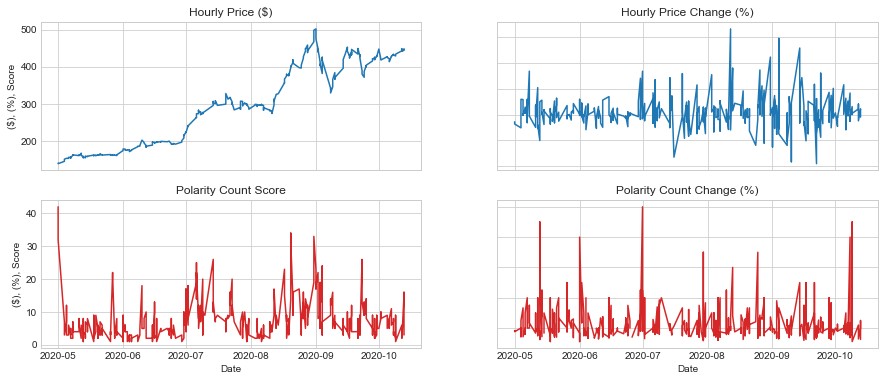

In [42]:
date_only = df_2.index.get_level_values(0)

fig, axs = plt.subplots(2, 2, figsize=(15,6))
axs[0, 0].plot(date_only, df_2['Close'])
axs[0, 0].set_title('Hourly Price ($)')
axs[1, 0].plot(date_only, df_2['polarity count'], 'tab:red')
axs[1, 0].set_title('Polarity Count Score')

axs[0, 1].plot(date_only, df_2['hourly return'])
axs[0, 1].set_title('Hourly Price Change (%)')
axs[1, 1].plot(date_only, df_2['polarity count change'], 'tab:red')
axs[1, 1].set_title('Polarity Count Change (%)')


for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [43]:
correlation_drop_2 = df_2.corr()
correlation_drop_2

Close  hourly return      tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
Close                  1.000000       0.061582  0.039220     -0.237593       0.040006      0.177175        0.300113        0.059352       0.018912             -0.048330            -0.043713              -0.031413              -0.000538             -0.070354
hourly return          0.061582       1.000000  0.651528     -0.062270       0.002936     -0.005426        0.018564       -0.045537      -0.060978             -0.033558            -0.036110               0.145301               0.090006             -0.031880
tick                   0.039220       0.651528  1.000000     -0.033242       0.006385      0.002172       -0.030633       -0.002608      -0.085007             -0.051840            -0.051842               0.086671               0.051389             -0.058343
Subjectivity          -0.237593      -0.062270 -0.033242      1.000000       0.088542      0.019541       -0.233866        0.022498       0.054939              0.067946             0.067768              -0.019365              -0.015025              0.086117
polarity mean          0.040006       0.002936  0.006385      0.088542       1.000000      0.684111       -0.068576        0.450573       0.563306              0.094587             0.077631               0.066783               0.114543              0.063979
polarity sum           0.177175      -0.005426  0.002172      0.019541       0.684111      1.000000        0.354134        0.308427       0.413611              0.017861            -0.002158               0.164497               0.160153              0.009680
polarity count         0.300113       0.018564 -0.030633     -0.233866      -0.068576      0.354134        1.000000        0.035806      -0.037372             -0.071156            -0.071068               0.120100               0.097739             -0.043485
polarity first         0.059352      -0.045537 -0.002608      0.022498       0.450573      0.308427        0.035806        1.000000      -0.002095             -0.010998            -0.024470               0.048504               0.118756             -0.025401
polarity last          0.018912      -0.060978 -0.085007      0.054939       0.563306      0.413611       -0.037372       -0.002095       1.000000              0.127609             0.081176               0.027002              -0.010699              0.153029
polarity mean change  -0.048330      -0.033558 -0.051840      0.067946       0.094587      0.017861       -0.071156       -0.010998       0.127609              1.000000             0.981833              -0.030690               0.045089              0.959086
polarity sum change   -0.043713      -0.036110 -0.051842      0.067768       0.077631     -0.002158       -0.071068       -0.024470       0.081176              0.981833             1.000000              -0.023888               0.037286              0.929974
polarity count change -0.031413       0.145301  0.086671     -0.019365       0.066783      0.164497        0.120100        0.048504       0.027002             -0.030690            -0.023888               1.000000              -0.041149             -0.036599
polarity first change -0.000538       0.090006  0.051389     -0.015025       0.114543      0.160153        0.097739        0.118756      -0.010699              0.045089             0.037286              -0.041149               1.000000             -0.400674
polarity last change  -0.070354      -0.031880 -0.058343      0.086117       0.063979      0.009680       -0.043485       -0.025401       0.153029              0.959086             0.929974              -0.036599              -0.400674              1.000000

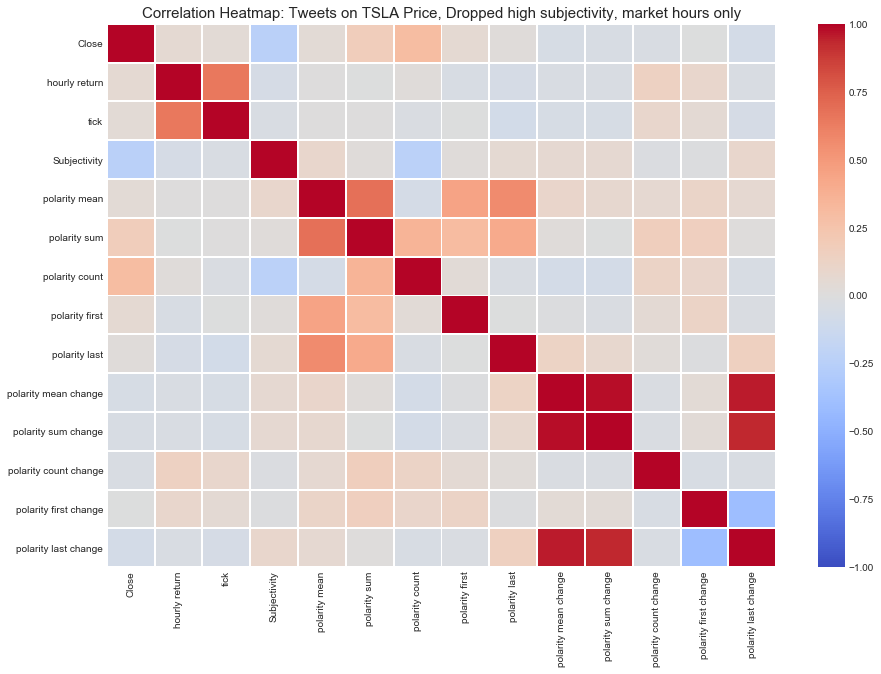

In [44]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap: Tweets on TSLA Price, Dropped high subjectivity, market hours only', fontsize=15)
sns.heatmap(correlation_drop_2, vmin=-1, vmax=1, linewidth=1, cmap='coolwarm');

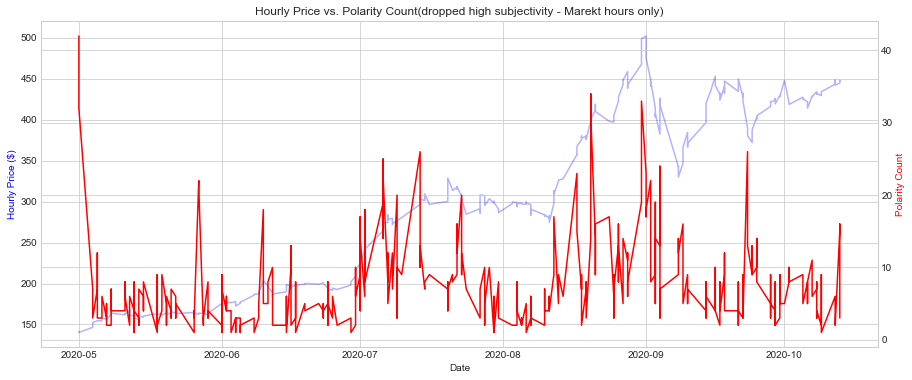

In [45]:
# plot the highest correlation with hourly return
date_only = df_2.index.get_level_values(0)

fig, ax1 = plt.subplots(figsize=(15,6))
ax1.set_title('Hourly Price vs. Polarity Count(dropped high subjectivity - Marekt hours only)')

ax2 = ax1.twinx()
ax1.plot(date_only, df_2['Close'], color='b', alpha=0.3)
ax2.plot(date_only, df_2['polarity count'], color='r')

ax1.set_xlabel('Date')
ax1.set_ylabel('Hourly Price ($)', color='b')
ax2.set_ylabel('Polarity Count', color='r')
# ax1.set_xticklabels(date_only, rotation=45, size=8)

fig.show();

### 3. Using adjusted sentiment score for all texts regardless of market hours

In [46]:
# take the average polarity scores in the same hour window.
df_weight = df_weight.rename(columns = {'Adj Polarity':'Polarity'})
df_mean = df_weight.groupby(['date only', 'hour']).mean()
df_sum = df_weight.groupby(['date only', 'hour']).sum()
df_count = df_weight.groupby(['date only', 'hour']).count()
df_first = df_weight.groupby(['date only', 'hour']).first()
df_last = df_weight.groupby(['date only', 'hour']).last()
df_data = df_mean.copy()

In [47]:
df_data = df_data.rename(columns = {'Polarity':'polarity mean'})
df_data['polarity sum'] = df_sum['Polarity']
df_data['polarity count'] = df_count['Polarity']
df_data['polarity first'] = df_first['Polarity']
df_data['polarity last'] = df_last['Polarity']
df_data.head()

Close  hourly return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last
date only  hour                                                                                                                           
2020-04-30 8     167.694000       0.048284   1.0           NaN            NaN           0.0               0             NaN            NaN
           9     165.144577      -0.015203   0.0           NaN            NaN           0.0               0             NaN            NaN
           10    164.380005      -0.004630   0.0           NaN            NaN           0.0               0             NaN            NaN
           11    157.552002      -0.041538   0.0           NaN            NaN           0.0               0             NaN            NaN
           12    154.054016      -0.022202   0.0           NaN            NaN           0.0               0             NaN            NaN

In [48]:
df_data['polarity mean change'] = df_data['polarity mean'].pct_change()
df_data['polarity sum change'] = df_data['polarity sum'].pct_change()
df_data['polarity count change'] = df_data['polarity count'].pct_change()
df_data['polarity first change'] = df_data['polarity first'].pct_change()
df_data['polarity last change'] = df_data['polarity last'].pct_change()
df_data.head()

Close  hourly return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
date only  hour                                                                                                                                                                                                                                          
2020-04-30 8     167.694000       0.048284   1.0           NaN            NaN           0.0               0             NaN            NaN                   NaN                  NaN                    NaN                    NaN                   NaN
           9     165.144577      -0.015203   0.0           NaN            NaN           0.0               0             NaN            NaN                   NaN                  NaN                    NaN                    NaN                   NaN
           10    164.380005      -0.004630   0.0           NaN            NaN           0.0               0             NaN            NaN                   NaN                  NaN                    NaN                    NaN                   NaN
           11    157.552002      -0.041538   0.0           NaN            NaN           0.0               0             NaN            NaN                   NaN                  NaN                    NaN                    NaN                   NaN
           12    154.054016      -0.022202   0.0           NaN            NaN           0.0               0             NaN            NaN                   NaN                  NaN                    NaN                    NaN                   NaN

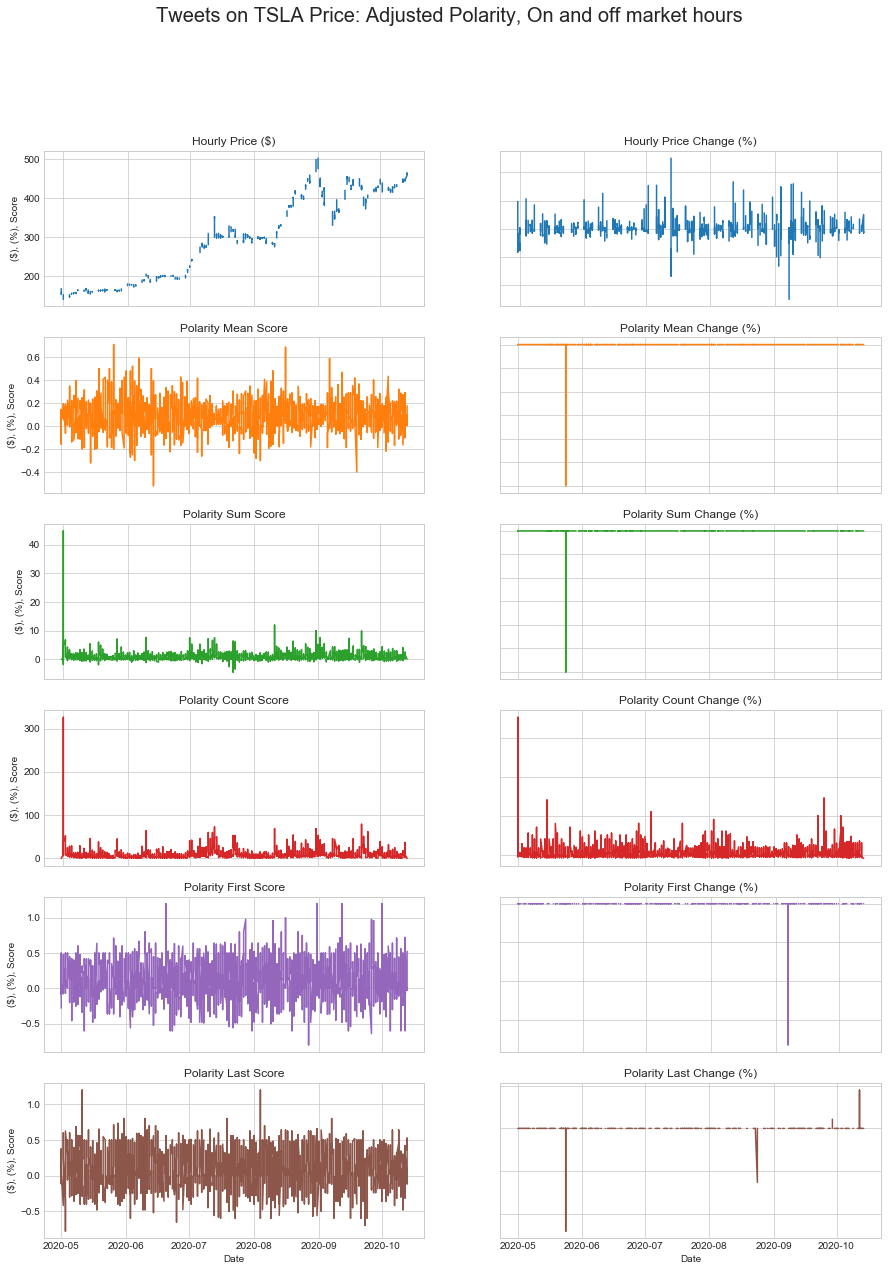

In [49]:
# plot total overviews
date_only = df_data.index.get_level_values(0)

fig, axs = plt.subplots(6, 2, figsize=(15,20))
fig.suptitle('Tweets on TSLA Price: Adjusted Polarity, On and off market hours', fontsize=20)

axs[0, 0].plot(date_only, df_data['Close'])
axs[0, 0].set_title('Hourly Price ($)')
axs[1, 0].plot(date_only, df_data['polarity mean'], 'tab:orange')
axs[1, 0].set_title('Polarity Mean Score')
axs[2, 0].plot(date_only, df_data['polarity sum'], 'tab:green')
axs[2, 0].set_title('Polarity Sum Score')
axs[3, 0].plot(date_only, df_data['polarity count'], 'tab:red')
axs[3, 0].set_title('Polarity Count Score')
axs[4, 0].plot(date_only, df_data['polarity first'], 'tab:purple')
axs[4, 0].set_title('Polarity First Score')
axs[5, 0].plot(date_only, df_data['polarity last'], 'tab:brown')
axs[5, 0].set_title('Polarity Last Score')

axs[0, 1].plot(date_only, df_data['hourly return'])
axs[0, 1].set_title('Hourly Price Change (%)')
axs[1, 1].plot(date_only, df_data['polarity mean change'], 'tab:orange')
axs[1, 1].set_title('Polarity Mean Change (%)')
axs[2, 1].plot(date_only, df_data['polarity sum change'], 'tab:green')
axs[2, 1].set_title('Polarity Sum Change (%)')
axs[3, 1].plot(date_only, df_data['polarity count change'], 'tab:red')
axs[3, 1].set_title('Polarity Count Change (%)')
axs[4, 1].plot(date_only, df_data['polarity first change'], 'tab:purple')
axs[4, 1].set_title('Polarity First Change (%)')
axs[5, 1].plot(date_only, df_data['polarity last change'], 'tab:brown')
axs[5, 1].set_title('Polarity Last Change (%)')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [50]:
correlation_weight = df_data.corr()
correlation_weight

Close  hourly return      tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
Close                  1.000000       0.020711  0.013880     -0.113904      -0.054996      0.016576        0.091754        0.003628      -0.025968             -0.012452            -0.028713              -0.087547              -0.063810              0.052931
hourly return          0.020711       1.000000  0.603705     -0.041238       0.023455     -0.041993       -0.056866        0.005799      -0.007247             -0.008468            -0.017819              -0.037466               0.021973              0.028952
tick                   0.013880       0.603705  1.000000      0.016056      -0.008350     -0.014557       -0.017864        0.031118      -0.035251             -0.045853            -0.049130              -0.015421              -0.002804              0.063365
Subjectivity          -0.113904      -0.041238  0.016056      1.000000       0.187605      0.048231       -0.043287        0.082799       0.083391             -0.017219            -0.017222               0.000175               0.002791             -0.022181
polarity mean         -0.054996       0.023455 -0.008350      0.187605       1.000000      0.319520       -0.026302        0.459139       0.454297              0.005866             0.005865              -0.004310               0.002403              0.012614
polarity sum           0.016576      -0.041993 -0.014557      0.048231       0.319520      1.000000        0.850731        0.151400       0.154109              0.007540             0.007558               0.263898               0.003713              0.009424
polarity count         0.091754      -0.056866 -0.017864     -0.043287      -0.026302      0.850731        1.000000       -0.010028       0.002878              0.008303             0.008329               0.262148               0.003538              0.008629
polarity first         0.003628       0.005799  0.031118      0.082799       0.459139      0.151400       -0.010028        1.000000       0.074195              0.019506             0.019509               0.006727               0.027356              0.020222
polarity last         -0.025968      -0.007247 -0.035251      0.083391       0.454297      0.154109        0.002878        0.074195       1.000000             -0.008590            -0.008595              -0.000576              -0.030393              0.005661
polarity mean change  -0.012452      -0.008468 -0.045853     -0.017219       0.005866      0.007540        0.008303        0.019506      -0.008590              1.000000             1.000000              -0.010341               0.000926              0.838293
polarity sum change   -0.028713      -0.017819 -0.049130     -0.017222       0.005865      0.007558        0.008329        0.019509      -0.008595              1.000000             1.000000              -0.010341               0.001377              0.838293
polarity count change -0.087547      -0.037466 -0.015421      0.000175      -0.004310      0.263898        0.262148        0.006727      -0.000576             -0.010341            -0.010341               1.000000               0.012002             -0.005455
polarity first change -0.063810       0.021973 -0.002804      0.002791       0.002403      0.003713        0.003538        0.027356      -0.030393              0.000926             0.001377               0.012002               1.000000              0.000457
polarity last change   0.052931       0.028952  0.063365     -0.022181       0.012614      0.009424        0.008629        0.020222       0.005661              0.838293             0.838293              -0.005455               0.000457              1.000000

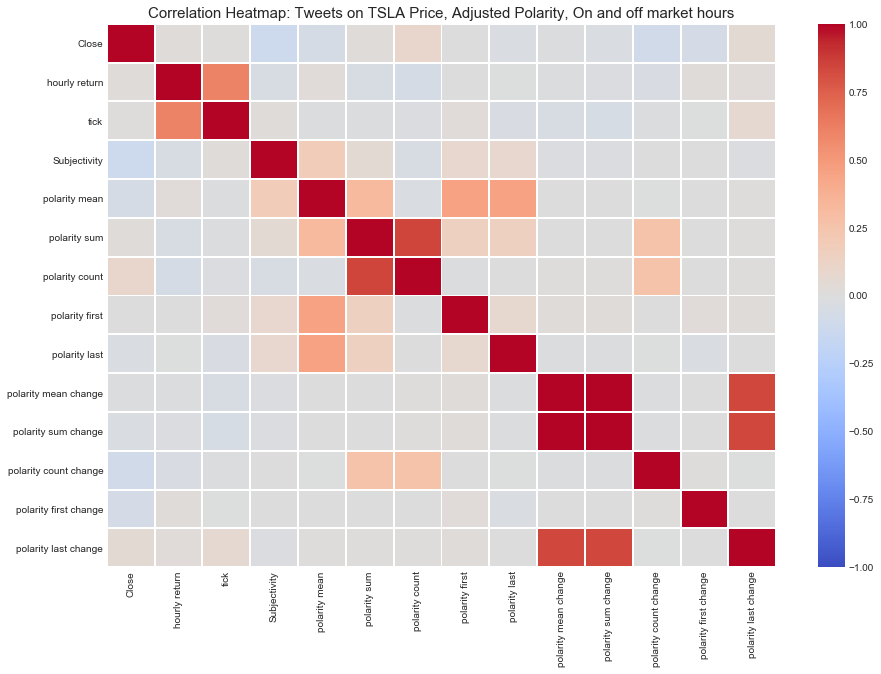

In [51]:
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap: Tweets on TSLA Price, Adjusted Polarity, On and off market hours', fontsize=15)
sns.heatmap(correlation_weight, vmin=-1, vmax=1, linewidth=1, cmap='coolwarm');

### 4. Using adjusted sentiment score for the texts within market hours

In [52]:
# Dropping unmatching rows 
df_2 = df_data.dropna()
df_2

Close  hourly return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
date only  hour                                                                                                                                                                                                                                          
2020-05-01 11    142.477005       0.001244   1.0      0.481859       0.128845     40.070838             311        0.265000       0.160000             -0.064040            -0.107106              -0.046012                    inf         -5.566502e-01
           12    142.520996       0.000309   1.0      0.475321       0.110423     24.845114             225        0.014000       0.130000             -0.142981            -0.379970              -0.276527              -0.947170         -1.875000e-01
           13    141.537994      -0.006897   0.0      0.487748       0.105556     16.255699             154       -0.040000       0.000000             -0.044069            -0.345718              -0.315556              -3.857143         -1.000000e+00
2020-05-04 8     147.701202       0.053038   1.0      0.325444       0.132599      2.254181              17        0.000000       0.160000              0.249859             0.517686               0.214286              -1.000000          0.000000e+00
           9     147.601440      -0.000675   0.0      0.460780       0.113050      3.165413              28        0.160000       0.500000             -0.147425             0.404241               0.647059                    inf          2.125000e+00
           10    148.399994       0.005410   1.0      0.439617       0.094509      1.701163              18        0.000000       0.144000             -0.164010            -0.462578              -0.357143              -1.000000         -7.120000e-01
           11    146.506012      -0.012763   0.0      0.474592       0.079170      1.345896              17        0.130667       0.177500             -0.162299            -0.208838              -0.055556                    inf          2.326389e-01
           12    148.562195       0.014035   1.0      0.430704       0.132063      1.452689              11        0.219886       0.025000              0.668083             0.079348              -0.352941               0.682799         -8.591549e-01
           13    150.003143       0.009699   1.0      0.572639       0.155559      1.711146              11        0.002222       0.500000              0.177916             0.177916               0.000000              -0.989894          1.900000e+01
           14    152.242004       0.014925   1.0      0.444107       0.180964      1.266750               7        0.048000       0.250000              0.163318            -0.259707              -0.363636              20.600000         -5.000000e-01
2020-05-05 8     154.475662       0.014672   1.0      0.419162       0.055077      0.826162              15       -0.013778       0.227273             -0.768139            -0.565261               0.875000                   -inf                   inf
           9     154.404037      -0.000464   0.0      0.387109      -0.005894     -0.170926              29        0.000000       0.000000             -1.107013            -1.206892               0.933333              -1.000000         -1.000000e+00
           10    154.593994       0.001230   1.0      0.394922       0.115974      1.739607              15        0.330000      -0.015909            -20.676541           -11.177521              -0.482759                    inf                  -inf
           11    154.601761       0.000050   1.0      0.464172       0.047532      0.427784               9        0.160000      -0.053333             -0.590153            -0.754092              -0.400000              -0.515152          2.352381e+00
           12    155.5

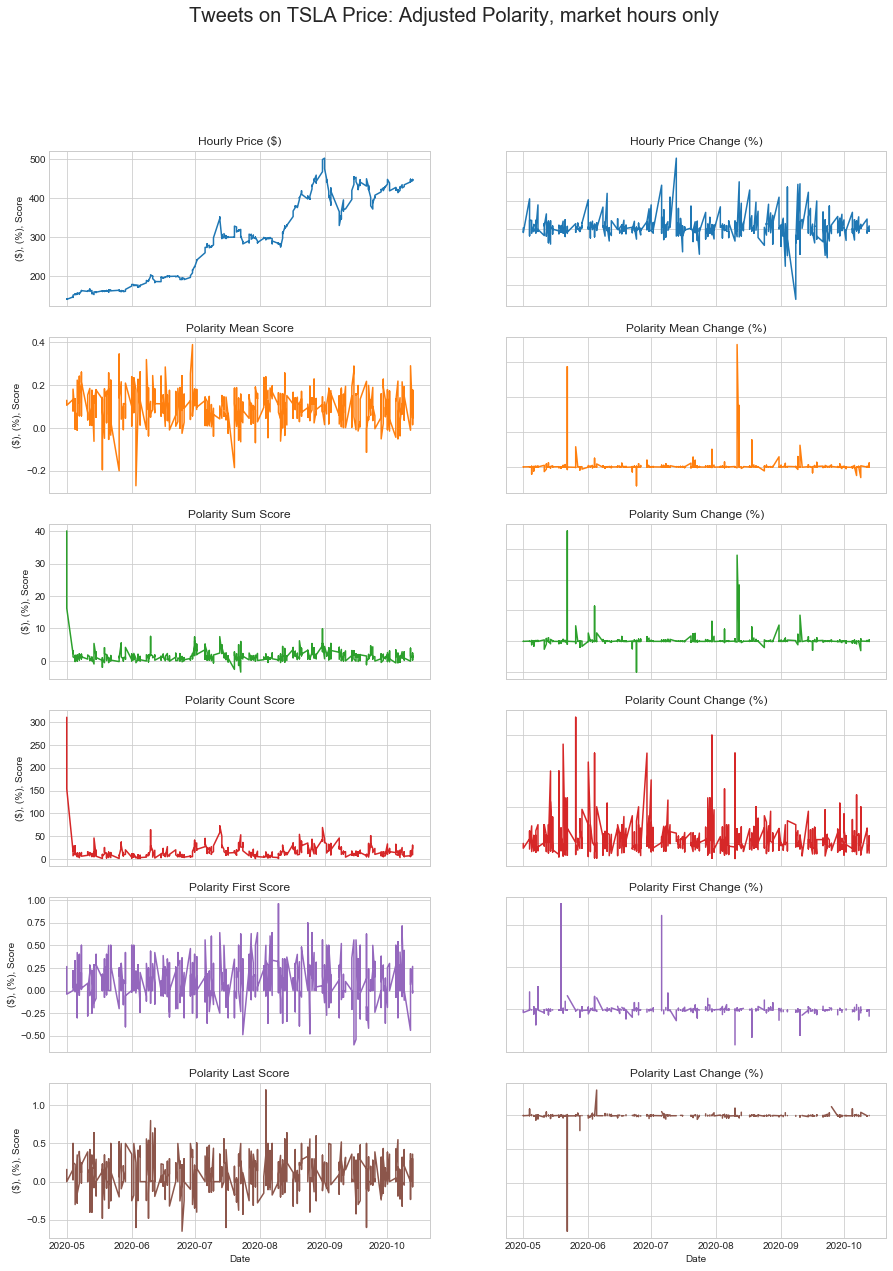

In [53]:
# plot total overviews
date_only = df_2.index.get_level_values(0)

fig, axs = plt.subplots(6, 2, figsize=(15,20))
fig.suptitle('Tweets on TSLA Price: Adjusted Polarity, market hours only', fontsize=20)

axs[0, 0].plot(date_only, df_2['Close'])
axs[0, 0].set_title('Hourly Price ($)')
axs[1, 0].plot(date_only, df_2['polarity mean'], 'tab:orange')
axs[1, 0].set_title('Polarity Mean Score')
axs[2, 0].plot(date_only, df_2['polarity sum'], 'tab:green')
axs[2, 0].set_title('Polarity Sum Score')
axs[3, 0].plot(date_only, df_2['polarity count'], 'tab:red')
axs[3, 0].set_title('Polarity Count Score')
axs[4, 0].plot(date_only, df_2['polarity first'], 'tab:purple')
axs[4, 0].set_title('Polarity First Score')
axs[5, 0].plot(date_only, df_2['polarity last'], 'tab:brown')
axs[5, 0].set_title('Polarity Last Score')

axs[0, 1].plot(date_only, df_2['hourly return'])
axs[0, 1].set_title('Hourly Price Change (%)')
axs[1, 1].plot(date_only, df_2['polarity mean change'], 'tab:orange')
axs[1, 1].set_title('Polarity Mean Change (%)')
axs[2, 1].plot(date_only, df_2['polarity sum change'], 'tab:green')
axs[2, 1].set_title('Polarity Sum Change (%)')
axs[3, 1].plot(date_only, df_2['polarity count change'], 'tab:red')
axs[3, 1].set_title('Polarity Count Change (%)')
axs[4, 1].plot(date_only, df_2['polarity first change'], 'tab:purple')
axs[4, 1].set_title('Polarity First Change (%)')
axs[5, 1].plot(date_only, df_2['polarity last change'], 'tab:brown')
axs[5, 1].set_title('Polarity Last Change (%)')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [54]:
correlation_weight_2 = df_2.corr()
correlation_weight_2

Close  hourly return      tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
Close                  1.000000       0.013781 -0.009040     -0.159215      -0.065003      0.046540        0.125755        0.007100      -0.005138             -0.017043            -0.023695              -0.102852              -0.079663              0.048392
hourly return          0.013781       1.000000  0.593488     -0.052688       0.019540      0.011142        0.001166       -0.001861      -0.004997             -0.007334            -0.002585               0.030428               0.023287              0.029554
tick                  -0.009040       0.593488  1.000000      0.023449      -0.002098      0.029956        0.024032        0.032374      -0.042227             -0.044665            -0.039619               0.046948               0.004308              0.059826
Subjectivity          -0.159215      -0.052688  0.023449      1.000000       0.100048      0.037335       -0.023655        0.009066       0.059166              0.029708             0.036448              -0.001097               0.015195             -0.022377
polarity mean         -0.065003       0.019540 -0.002098      0.100048       1.000000      0.309521       -0.050174        0.298602       0.378899             -0.019599            -0.000863              -0.029011               0.080971              0.039762
polarity sum           0.046540       0.011142  0.029956      0.037335       0.309521      1.000000        0.878172        0.116305       0.112770             -0.008163            -0.001230               0.037732               0.047277              0.023423
polarity count         0.125755       0.001166  0.024032     -0.023655      -0.050174      0.878172        1.000000       -0.002320       0.007007             -0.020072            -0.017844               0.042154              -0.009857              0.020327
polarity first         0.007100      -0.001861  0.032374      0.009066       0.298602      0.116305       -0.002320        1.000000       0.006543              0.024027             0.030192              -0.001453               0.177197              0.003133
polarity last         -0.005138      -0.004997 -0.042227      0.059166       0.378899      0.112770        0.007007        0.006543       1.000000             -0.034953            -0.061314              -0.094869               0.005665              0.133628
polarity mean change  -0.017043      -0.007334 -0.044665      0.029708      -0.019599     -0.008163       -0.020072        0.024027      -0.034953              1.000000             0.953701              -0.021900               0.005678             -0.548285
polarity sum change   -0.023695      -0.002585 -0.039619      0.036448      -0.000863     -0.001230       -0.017844        0.030192      -0.061314              0.953701             1.000000               0.039497               0.022266             -0.676908
polarity count change -0.102852       0.030428  0.046948     -0.001097      -0.029011      0.037732        0.042154       -0.001453      -0.094869             -0.021900             0.039497               1.000000              -0.028126             -0.013137
polarity first change -0.079663       0.023287  0.004308      0.015195       0.080971      0.047277       -0.009857        0.177197       0.005665              0.005678             0.022266              -0.028126               1.000000              0.082497
polarity last change   0.048392       0.029554  0.059826     -0.022377       0.039762      0.023423        0.020327        0.003133       0.133628             -0.548285            -0.676908              -0.013137               0.082497              1.000000

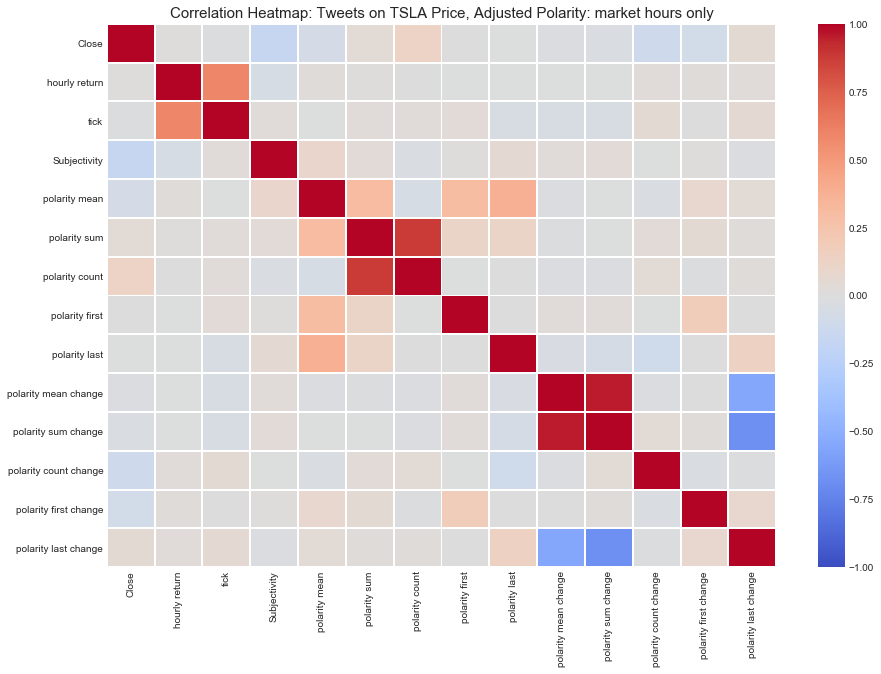

In [55]:
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap: Tweets on TSLA Price, Adjusted Polarity: market hours only', fontsize=15)
sns.heatmap(correlation_weight_2, vmin=-1, vmax=1, linewidth=1, cmap='coolwarm');